In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
# transform: 이미지를 torch tensor를 읽고 변환해주는 라이브러리
# normalize: 이미지 tensor들을 정규화, 0.5는 normalize하는 일종의 기준 

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

0it [00:00, ?it/s]

Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


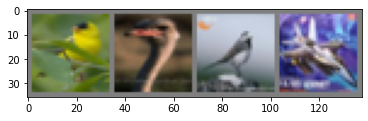

bird  bird  bird  plane
<class 'torch.Tensor'> torch.Size([4, 3, 32, 32])
<class 'torch.Tensor'> torch.Size([4]) tensor([2, 2, 2, 0])


In [8]:
# 사진 Inspect, 채널을 잘못불러올경우 이미지가 엉망일 수 있으니 한번 검사해야됨

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

print(type(images), images.shape) # image type이 torch.tensor
print(type(labels), labels.shape, labels)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [11]:
import torch.nn as nn
import torch.nn.functional as F


class MLP(nn.Module):
    def __init__(self, in_dim, out_dim, hid_dim, n_layer, act):
        super(MLP, self).__init__()
        self.in_dim = in_dim  # orward에서도 이 값들을 사용하므로 input 인자들도 self로 넣어줌
        self.out_dim = out_dim
        self.hid_dim = hid_dim
        self.n_layer = n_layer
        self.act = act

        self.fc1 = nn.Linear(self.in_dim, self.hid_dim)
        self.linears = nn.ModuleList()

        # ModuleList에 hiddenlayer 넣음 (인풋레이어도 레이러로 친다면 self.n_layer-2적용)
        # self.n_layer-1을 한 이유는 마지막 outputlayer는 out_dim 따로 설정해야함
        for i in range(self.n_layer - 1):
            self.linears.append(nn.Linear(self.hid_dim, self.hid_dim))
        self.fc2 = nn.Linear(self.hid_dim, self.out_dim)

        if self.act == 'relu':
            self.act = nn.ReLU()

    def forward(self, x):
        x = self.act(self.fc1(x))
        for fc in self.linears:
            x = self.act(fc(x))
        x = self.fc2(x)
        return x

model = MLP(3072, 10, 100, 4, 'relu')
print(model)

MLP(
  (fc1): Linear(in_features=3072, out_features=100, bias=True)
  (linears): ModuleList(
    (0): Linear(in_features=100, out_features=100, bias=True)
    (1): Linear(in_features=100, out_features=100, bias=True)
    (2): Linear(in_features=100, out_features=100, bias=True)
  )
  (fc2): Linear(in_features=100, out_features=10, bias=True)
  (act): ReLU()
)
